### Checklist for submission

It is extremely important to make sure that:

1. Everything runs as expected (no bugs when running cells);
2. The output from each cell corresponds to its code (don't change any cell's contents without rerunning it afterwards);
3. All outputs are present (don't delete any of the outputs);
4. Fill in all the places that say `# YOUR CODE HERE`, or "**Your answer:** (fill in here)".
5. Never copy/paste any notebook cells. Inserting new cells is allowed, but it should not be necessary.
6. The notebook contains some hidden metadata which is important during our grading process. **Make sure not to corrupt any of this metadata!** The metadata may for example be corrupted if you copy/paste any notebook cells, or if you perform an unsuccessful git merge / git pull. It may also be pruned completely if using Google Colab, so watch out for this. Searching for "nbgrader" when opening the notebook in a text editor should take you to the important metadata entries.
7. Although we will try our very best to avoid this, it may happen that bugs are found after an assignment is released, and that we will push an updated version of the assignment to GitHub. If this happens, it is important that you update to the new version, while making sure the notebook metadata is properly updated as well. The safest way to make sure nothing gets messed up is to start from scratch on a clean updated version of the notebook, copy/pasting your code from the cells of the previous version into the cells of the new version.
8. If you need to have multiple parallel versions of this notebook, make sure not to move them to another directory.
9. Although not forced to work exclusively in the course `conda` environment, you need to make sure that the notebook will run in that environment, i.e. that you have not added any additional dependencies.

**FOR HA1, HA2, HA3 ONLY:** Failing to meet any of these requirements might lead to either a subtraction of POEs (at best) or a request for resubmission (at worst).

We advise you to perform the following steps before submission to ensure that requirements 1, 2, and 3 are always met: **Restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All). This might require a bit of time, so plan ahead for this (and possibly use Google Cloud's GPU in HA1 and HA2 for this step). Finally press the "Save and Checkout" button before handing in, to make sure that all your changes are saved to this .ipynb file.

### Fill in name of notebook file
This might seem silly, but the version check below needs to know the filename of the current notebook, which is not trivial to find out programmatically.

You might want to have several parallel versions of the notebook, and it is fine to rename the notebook as long as it stays in the same directory. **However**, if you do rename it, you also need to update its own filename below:

In [ ]:
# nb_fname = "XXX.ipynb"

### Fill in group number and member names (use NAME2 and GROUP only for HA1, HA2 and HA3):

In [ ]:
NAME1 = "" 
NAME2 = ""
GROUP = ""

### Check Python version

In [ ]:
from platform import python_version_tuple
assert python_version_tuple()[:2] == ('3','7'), "You are not running Python 3.7. Make sure to run Python through the course Conda environment."

### Check that notebook server has access to all required resources, and that notebook has not moved

In [ ]:
import os
nb_dirname = os.path.abspath('')
assignment_name = os.path.basename(nb_dirname)
assert assignment_name in ['IHA1', 'IHA2', 'HA1', 'HA2', 'HA3'], \
    '[ERROR] The notebook appears to have been moved from its original directory'

### Verify correct nb_fname

In [ ]:
from IPython.display import display, HTML
try:
    display(HTML(r'<script>if("{nb_fname}" != IPython.notebook.notebook_name) {{ alert("You have filled in nb_fname = \"{nb_fname}\", but this does not seem to match the notebook filename \"" + IPython.notebook.notebook_name + "\"."); }}</script>'.format(nb_fname=nb_fname)))
except NameError:
    assert False, 'Make sure to fill in the nb_fname variable above!'

### Verify that your notebook is up-to-date and not corrupted in any way

In [ ]:
import sys
sys.path.append('..')
from ha_utils import check_notebook_uptodate_and_not_corrupted
check_notebook_uptodate_and_not_corrupted(nb_dirname, nb_fname)

# HA1 - Cats and dogs

<img src="https://cdn.pixabay.com/photo/2015/05/20/10/03/cat-and-dog-775116_960_720.jpg" alt="Image of cats and dogs" style="width: 500px;"/>

For this home assignment, we'll use the Kaggle dataset for the [Dogs vs. Cats competition](https://www.kaggle.com/c/dogs-vs-cats). It is comprised of 25k colour images of dogs and cats. Our goal with this dataset will be to create a classifier that can tell us if the input image is of a cat or a dog.

## Using your cloud GPU
As a way of helping you speed up the training process, each group gets access to a cloud instance with a GPU. Take a look at the [instructions folder](https://github.com/JulianoLagana/deep-machine-learning/blob/master/instructions/) to understand how to connect to an instance and use our tools there. You're free to use this limited resource as you see fit, but if you spend all your credits, you'll need a late day to obtain more (and you can only do this once).

### Strong recommendation:
In order to make the most out of your GPU hours, first try solving the initial part of this notebook (tasks 0-3) in your own computer (these tasks can be solved on the CPU), and leave most of the available hours for solving tasks 4-5, and refining your best model further (and, if you have the spare hours, experiment a bit!).

### Working efficiently:
Training for several epochs just to have your code break at the last validation step is incredibly frustrating and inefficient. Good practice is to first test long training runs with a much simpler dry-run: a single epoch, a few batches et c.

Requirements:
- Whenever we ask you to plot anything, be sure to add a title and label the axes. If you're plotting more than one curve in the same plot, also add a legend.
- When we ask you to train an architecture, train it for a reasonable number of epochs. "Reasonable" here means you should be fairly confident that training for a higher number of epochs wouldn't impact your conclusions regarding the model's performance. When experimenting, a single epoch is often enough to tell whether your model setup has improved or not.


Hints:
- If you get errors saying you've exhausted the GPU resources, well, then you've exhausted the GPU resources. However, sometimes that's because `pytorch` didn't release a part of the GPU's memory. If you think your CNN should fit in your memory during training, try restarting the kernel and directly training only that architecture.
- Every group has enough cloud credits to complete this assignment. However, this statement assumes you'll use your resources judiciously (e.g. always try the code first in your machine and make sure everything works properly before starting your instances) and **won't forget to stop your instance after using it,**  otherwise you might run out of credits.
- Before starting, take a look at the images we'll be using. This is a hard task, don't get discouraged if your first models perform poorly (several participants in the original competition didn't achieve an accuracy higher than 60%).
- Solving the [computer labs](https://github.com/JulianoLagana/deep-machine-learning/tree/master/computer-labs) is a good way to get prepared for this assignment.

---
## 0. Imports

In the following cell, add all the imports you'll use in this assignment.

In [1]:
# YOUR CODE HERE
import os
import torch
from argparse import ArgumentParser
#os.environ["CUDA_VISIBLE_DEVICES"]="1"
#torch.cuda.set_device(0)
#CUDA_VISIBLE_DEVICES=1

from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  torch.utils.data import random_split
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from torch import nn
import torch.nn.functional as F
from torch import optim

#torch.cuda.set_device(1)


In [2]:
print(torch.cuda.current_device())
print(torch.cuda.device_count())
print(torch.cuda.get_device_name(0))
print(torch.cuda.is_available())
print(torch.cuda.device(0))
# parser = ArgumentParser(description=‘Example’)
# parser.add_argument(’–gpu’, type=int, default=[0,1], nargs=’+’, help=‘used gpu’)

# args = parser.parse_args()
# os.environ[“CUDA_VISIBLE_DEVICES”] = ‘,’.join(str(x) for x in args.gpu)

0
1
GeForce GTX 1050
True


---
## 1. Loading the data and preprocessing

The first step is to head to the [Kaggle website for the cats and dogs competition](https://www.kaggle.com/c/dogs-vs-cats/data) and download the data from there. You should download both the test and train folders together in one zip file (there is a `Download all` button at the bottom of the page). Unfortunately, you need to create a Kaggle account for this.

**Only necessary for tasks 4-6**: Downloading the data to your local computer is quite straight-forward. Sooner or later you will have to upload the data to the cloud instance and that is a bit more tricky. There are a few ways to do it:

 - Jupyter Notebook upload function. When starting the notebook server with the command `jupyter notebook` you are directed to a main page. In the top right corner there is an upload button.
 - Using [`scp`](https://linuxize.com/post/how-to-use-scp-command-to-securely-transfer-files/) to copy files via an ssh connection.
 - Using the [Kaggle CLI](https://github.com/Kaggle/kaggle-api). We have added it to the conda environment.

For this assignment we will again need data loaders. Like before we need to create a `Dataset` to give as input to a `DataLoader`. 
Fortunately, this type of image data is quite common so we get some help from `pytorch`. We can use [`ImageFolder`](https://pytorch.org/docs/stable/torchvision/datasets.html#imagefolder) to create a `Dataset` for our images. As long as our folder structure for the data conforms to the folder structure expected by `ImageFolder`, we can use it right out of the box and the `DataLoader` class will happily accept it as input.

To use `ImageFolder` you should create a folder structure that resembles the following (obviously, the folder names are up to you):


         small_train             small_val                train                   val
              |                      |                      |                      |
              |                      |                      |                      |
        -------------          -------------          -------------          -------------
        |           |          |           |          |           |          |           |
        |           |          |           |          |           |          |           |
      cats        dogs       cats        dogs       cats        dogs       cats        dogs


The `small_train` and `small_val` folders have the training and validation samples for your smaller subset of the data, while the `train` and `val` folders contain all the samples you extracted from Kaggle's `train.zip`.
This is just a convenient way of having a smaller dataset to play with for faster prototyping.

We provide you a notebook that shows how to achieve this folder structure (`create_project_notebook_structure.ipynb`), starting from the original `dogs-vs-cats.zip` file that you download from Kaggle. If you do use that notebook, we encourage you to understand how each step is being done, so you can generalize this knowledge to new datasets you'll encounter.

For the smaller dataset, we advise you to use 70% of the data as training data (and thereby the remaining 30% for validation data). However, for the larger dataset, you should decide how to split between training and validation.

**What percentage of the larger dataset did you decide to use for training?**

**Your answer:** (fill in here)

**Optional (1 POE):** Did you decide to keep the same ratio split between train and validation sets for the larger dataset? Motivate your decision!


**Your answer:** (fill in here)

Fill in the dataset paths (to be used later by your data loaders):

In [3]:
# TODO: Change the directories accordingly
train_path = "/train"
val_path = "/val"
small_train_path = "/small_train"
small_val_path = "/small_val"
# YOUR CODE HERE

---
### 1.1 Preprocessing
**(1 POE)** 

Once you have the expected folder structure, create two data loaders for automatically generating batches from the images in your smaller subset of data. It is here we choose how to preprocess the input data. There are multiple reasons for why we preprocess data:

- Some transformations might be needed to actually make the data work with our network (reshaping, permuting dimensions et c.).
- Make the training more efficient by making the input dimensions smaller, e.g. resizing, cropping.
- Artificially expanding the training data through [data augmentation](https://cartesianfaith.com/2016/10/06/what-you-need-to-know-about-data-augmentation-for-machine-learning/)
- We have some clever idea of how to change the data to make the training process better.

We do not expect you to do data augmentation, but feel free to preprocess the data as you see fit.
Construct an `ImageFolder` dataset like this:

```python
ImageFolder(<path_to_data_folder>, transform=Compose(<list_of_transforms>))
# example:
ImageFolder(Path.cwd() / "small_train", transform=Compose([ToTensor]))
```

Hints:
- Take a look at [`ImageFolder`](https://pytorch.org/docs/stable/torchvision/datasets.html#imagefolder) and [`DataLoader`](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) from the pytorch docs.
- To preprocess the data you can use the built-in pytorch [`Transforms`](https://pytorch.org/docs/stable/torchvision/transforms.html)
- The `ImageFolder` dataset provides the data as a python image type. For easy conversion to a `torch.Tensor`, use the [`ToTensor`](https://pytorch.org/docs/stable/torchvision/transforms.html#torchvision.transforms.ToTensor) transformation.
- The specified `batch_size` should be chosen so that you train fast but don't run out of memory. You need to figure this out empirically; start small and increase the batch size until you run out of memory.
- The `DataLoader` constructor takes an optional argument `num_workers`, which defaults to `0` if not provided. Setting a higher number creates multiple threads which load batches concurrently. This can speed up training considerably.  
- When feeding the images to your CNN, you'll probably want all of them to have the same spatial size, even though the .jpeg files differ in this. Resizing the images can be done using the previously mentioned built-in pytorch Transforms.
- Resizing the images to a smaller size while loading them can be beneficial. The VGG network that is used later in this assignment requires that images are at least 224x224, but before that use small images to speed up training. The CNN's do surprisingly well on 64x64 or even 32x32 images. Shorter training cycles give your more time to experiment!

We encourage you to explore the data and choose transformations that you believe to be useful. For exploration we provide you with some helper functions to visually compare transformations side by side:

In [4]:
def compare_transforms(transformations, index):
    """Visually compare transformations side by side.
    Takes a list of ImageFolder datasets with different compositions of transformations.
    It then display the `index`th image of the dataset for each transformed dataset in the list.
    
    Example usage:
        compare_transforms([dataset_with_transform_1, dataset_with_transform_2], 0)
    
    Args:
        transformations (list(ImageFolder)): list of ImageFolder instances with different transformations
        index (int): Index of the sample in the ImageFolder you wish to compare.
    """
    
    # Here we combine two neat functions from basic python to validate the input to the function:
    # - `all` takes an iterable (something we can loop over, like a list) of booleans
    #    and returns True if every element is True, otherwise it returns False.
    # - `isinstance` checks whether a variable is an instance of a particular type (class)
    if not all(isinstance(transf, ImageFolder) for transf in transformations):
        raise TypeError("All elements in the `transformations` list need to be of type ImageFolder")
        
    num_transformations = len(transformations)
    fig, axes = plt.subplots(1, num_transformations)
    
    # This is just a hack to make sure that `axes` is a list of the same length as `transformations`.
    # If we only have one element in the list, `plt.subplots` will not create a list of a single axis
    # but rather just an axis without a list.
    if num_transformations == 1:
        axes = [axes]
        
    for counter, (axis, transf) in enumerate(zip(axes, transformations)):
        axis.set_title("transf: {}".format(counter))
        image_tensor = transf[index][0]
        display_image(axis, image_tensor)

    plt.show()

def display_image(axis, image_tensor):
    """Display a tensor as image
    
    Example usage:
        _, axis = plt.subplots()
        some_random_index = 453
        image_tensor, _ = train_dataset[some_random_index]
        display_image(axis, image_tensor)
    
    Args:
        axis (pyplot axis)
        image_tensor (torch.Tensor): tensor with shape (num_channels=3, width, heigth)
    """
    
    # See hint above
    if not isinstance(image_tensor, torch.Tensor):
        raise TypeError("The `display_image` function expects a `torch.Tensor` " +
                        "use the `ToTensor` transformation to convert the images to tensors.")
        
    # The imshow commands expects a `numpy array` with shape (3, width, height)
    # We rearrange the dimensions with `permute` and then convert it to `numpy`
    image_data = image_tensor.permute(1, 2, 0).numpy()
    height, width, _ = image_data.shape
    axis.imshow(image_data)
    axis.set_xlim(0, width)
    # By convention when working with images, the origin is at the top left corner.
    # Therefore, we switch the order of the y limits.
    axis.set_ylim(height, 0)

In [11]:
TRANSFORM_IMG = transforms.Compose([
    transforms.Resize(68),
    transforms.CenterCrop(68),
    
    #transforms.ToPILImage(),
    transforms.ToTensor(),
  #  transforms.Normalize(mean=[0.485, 0.456, 0.406],
  #                       std=[0.229, 0.224, 0.225] )
    ])

train_dataset= ImageFolder( root="small_train",transform=TRANSFORM_IMG )
dataloader = DataLoader(train_dataset, batch_size=len(train_dataset), shuffle=False, num_workers=4)
pop_mean = []
pop_std0 = []
pop_std1 = []
for i, data in enumerate(dataloader, 0):
    # shape (batch_size, 3, height, width)
    print(i)
    print(data[0].shape)
    numpy_image = data[0].numpy()
    
    # shape (3,)
    small_train_mean = np.mean(numpy_image, axis=(0,2,3))
    small_train_std = np.std(numpy_image, axis=(0,2,3))
  #  batch_std1 = np.std(numpy_image, axis=(0,2,3), ddof=1)
    print(small_train_mean,small_train_std)
#     pop_mean.append(batch_mean)
#     pop_std0.append(batch_std0)
#     pop_std1.append(batch_std1)

#print(pop_mean)
#print(pop_std0)
#print(pop_std1)

##################################################################################################
val_dataset= ImageFolder( root="small_val",transform=TRANSFORM_IMG )
val_dataloader = DataLoader(val_dataset, batch_size=len(val_dataset), shuffle=False, num_workers=4)
# pop_mean = []
# pop_std0 = []
# pop_std1 = []
for i, data in enumerate(val_dataloader, 0):
    # shape (batch_size, 3, height, width)
    print(i)
    print(data[0].shape)
    numpy_image = data[0].numpy()
    
    # shape (3,)
    small_val_mean = np.mean(numpy_image, axis=(0,2,3))
    small_val_std = np.std(numpy_image, axis=(0,2,3))
  #  batch_std1 = np.std(numpy_image, axis=(0,2,3), ddof=1)
    print(small_val_mean,small_val_std)


0
torch.Size([3500, 3, 68, 68])
[0.48775533 0.45321816 0.4152076 ] [0.2525251  0.24551214 0.24812561]
0
torch.Size([1500, 3, 68, 68])
[0.49432093 0.45643577 0.41755685] [0.2535103  0.24754287 0.2497934 ]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


cuda


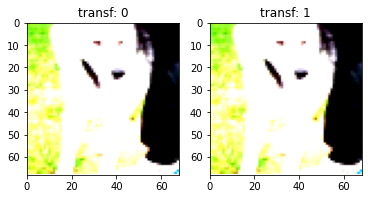

28


In [12]:
# YOUR CODE HERE
device = torch.device("cuda" if torch.cuda.is_available() 
                                  else "cpu")
    #transforms.Normalize(mean=[0.485, 0.456, 0.406],
     #                    std=[0.229, 0.224, 0.225] )
print(device)

TRANSFORM_TRAINIMG = transforms.Compose([
    transforms.Resize(68),
    transforms.CenterCrop(68),
    
    #transforms.ToPILImage(),
    transforms.ToTensor(),
    transforms.Normalize(mean=small_train_mean,
                         std =small_val_std )
    ])
TRANSFORM_VALIMG = transforms.Compose([
    transforms.Resize(68),
    transforms.CenterCrop(68),
    
    #transforms.ToPILImage(),
    transforms.ToTensor(),
    transforms.Normalize(mean=small_val_std,
                         std =small_val_std )
    ])



# TRANSFORM_IMG2 = transforms.Compose([
#     transforms.Resize(64),
#     transforms.CenterCrop(64),
#     transforms.ToTensor(),
#   #  transforms.Normalize(mean=[0.485, 0.456, 0.406],
#   #                       std=[0.229, 0.224, 0.225])
#     ])


# train_dataset2= ImageFolder( root="small_train", transform=transforms.Compose([transforms.ToTensor()]))
# loader = DataLoader(train_dataset2, batch_size=len(train_dataset2), num_workers=1)
# data = next(iter(loader))
# print(data[0].mean(), data[0].std())

# train_dataset= ImageFolder( root="small_train",transform=TRANSFORM_TRAINIMG )
# dataloader = DataLoader(train_dataset, batch_size=3500, shuffle=False, num_workers=4)
# pop_mean = []
# pop_std0 = []
# pop_std1 = []
# for i, data in enumerate(dataloader, 0):
    # shape (batch_size, 3, height, width)
#     print(i)
#     print(type(data))
#     print(len(data))
#     arr=np.array(data[0])
#     print(arr.shape)
#     print(data[0].shape)
    #print(data.size)
#     numpy_image = data[0].numpy()
    
#     # shape (3,)
#     batch_mean = np.mean(numpy_image, axis=(0,2,3))
#     batch_std0 = np.std(numpy_image, axis=(0,2,3))
#     batch_std1 = np.std(numpy_image, axis=(0,2,3), ddof=1)
    
#     pop_mean.append(batch_mean)
#     pop_std0.append(batch_std0)
#     pop_std1.append(batch_std1)

# print(pop_mean)
# print(pop_std0)
# print(pop_std1)
# shape (num_iterations, 3) -> (mean across 0th axis) -> shape (3,)
#pop_mean = np.array(pop_mean).mean(axis=0)
#pop_std0 = np.array(pop_std0).mean(axis=0)
#pop_std1 = np.array(pop_std1).mean(axis=0)



train_dataset= ImageFolder( root="small_train", transform=TRANSFORM_VALIMG )

train_data_loader = DataLoader(train_dataset, batch_size=128, shuffle=True, drop_last=False, num_workers=4)

val_dataset= ImageFolder( root="small_val", transform=TRANSFORM_VALIMG ) 

val_data_loader = DataLoader(val_dataset, batch_size=256, num_workers=4)

#print(type(dataset_1))
#print(type(data_loader_1))


compare_transforms([train_dataset,train_dataset], 2500)
j=0
for i, (data, labels) in enumerate(train_data_loader):
    j= j+1
print(j)    
   # print(type(data))
   # print(data.shape)
  #  print(labels.shape)


**(2 POE)** How did you select transformations, if any? Briefly explain your reasoning:

**Your answer:** (fill in here)

---
## 2. Training

**(1 POE)**

Create your first CNN architecture for this task. Start with something as simple as possible, that you're almost sure can get an accuracy better than 50% (we'll improve upon it later).
Naturally, you must also select a loss function and an optimizer.

Hints:

- Training on a CPU is slow and in the beginning you just want to verify that your architecture actually produces a predicition with the correct shape. Make everything you can to speed up the prototyping phase, e.g. train only for a single epoch and make the images ridiculously small.
- Going from the last CNN layer to the final fully connected layer is not trivial. The convolutions produces "3D" output which we can think of as an image with many channels, while the fully connected layer expects a row vector as input. Calculate how many output features the convolutions produce and use `.reshape` to make your tensor fit the fully connected layer. (It is also common to see the `.view` method to do the same thing. They basically do the same thing but have some differences in internal memory management.) *Hint within the hint:* remember that the fully connected layers expects a *batch* of 1D tensors. 


In [7]:
# YOUR CODE HERE
class ImageClassifierNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=20, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=20, out_channels=50, kernel_size=5)
        self.fc1 = nn.Linear(4*4*50, 150)
        self.fc2 = nn.Linear(150, 2)
       # self.fc3 = nn.Linear(500, 2)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, kernel_size=2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, kernel_size=2)
        x = x.view(-1, 4*4*50)
        x = F.relu(self.fc1(x))
      #  x = F.relu(self.fc2(x))
        x = self.fc2(x)
        return F.softmax(x, dim=1)
        #return x

In [13]:
print(torch.cuda.is_available())

True


Train your model using the two data loaders you created earlier. Train for a reasonable amount of epochs, so as to get a good sense of how well this architecture performs.

Hints:
- Note that you will need to plot your training and validation losses and accuracies, so make sure that you saved them during training. 

In [27]:
# Any pytorch object (e.g. model, inputs, output, etc.) can 
# be transferred to the current device by running
#       name_of_object.to(device)
# Example:
#       model.to(device)
#
# The following line automatically figures out what device (cpu or gpu)
# you are using and stores the result in `device`.
# Later we can use the `.to(device)` method to move our data or model to the correct device.



# YOUR CODE HERE
model = ImageClassifierNetwork()
model.to(device);
#loss_fn = nn.NLLLoss()
loss_fn = nn.CrossEntropyLoss()

optimizer = optim.Adam(model.parameters(), lr=0.001)
#optimizer = optim.SGD(model.parameters(), lr=0.0001,momentum=0.5)


def evaluate_model(val_data_loader, model, loss_fn):
    losses = []
    n_correct = 0
    with torch.no_grad():
        for b_x, b_y in val_data_loader:
            b_x=b_x.to(device)
            b_y=b_y.to(device)
            pred = model(b_x)
            loss = loss_fn(pred, b_y)
            losses.append(loss.item())
            
            hard_preds = pred.argmax(dim=1)
            n_correct += torch.sum(pred.argmax(dim=1) == b_y).item()
        val_accuracy = n_correct/len(val_dataset)
        val_avg_loss = sum(losses)/len(losses)    
    
    return val_accuracy, val_avg_loss



In [28]:
for epoch in range(35):
    losses = []
    n_correct = 0
    for b_x, b_y in train_data_loader:
        b_x=b_x.to(device)
        b_y=b_y.to(device)
        
        # Compute predictions and losses
        pred = model(b_x)
        loss = loss_fn(pred, b_y)
        
        losses.append(loss.item())
        
        # Count number of correct predictions
        hard_preds = pred.argmax(dim=1)
        n_correct += torch.sum(pred.argmax(dim=1) == b_y).item()

        # Backpropagate
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()    
        
    # Compute accuracy and loss in the entire training set
    train_accuracy = n_correct/len(train_dataset)
    train_avg_loss = sum(losses)/len(losses)    
    

    # Compute accuracy and loss in the entire validation set
   
    val_accuracy, val_avg_loss = evaluate_model(val_data_loader, model, loss_fn)
  
    
    
    # Display metrics
    display_str = 'Epoch {} '
    display_str += '\tLoss: {:.3f} '
    display_str += '\tLoss (val): {:.3f}'
    display_str += '\tAccuracy: {:.2f} '
    display_str += '\tAccuracy (val): {:.2f}'
    print(display_str.format(epoch, train_avg_loss, val_avg_loss, train_accuracy, val_accuracy))

Epoch 0 	Loss: 0.695 	Loss (val): 0.693	Accuracy: 0.50 	Accuracy (val): 0.50
Epoch 1 	Loss: 0.690 	Loss (val): 0.694	Accuracy: 0.53 	Accuracy (val): 0.54
Epoch 2 	Loss: 0.686 	Loss (val): 0.687	Accuracy: 0.55 	Accuracy (val): 0.50
Epoch 3 	Loss: 0.682 	Loss (val): 0.680	Accuracy: 0.54 	Accuracy (val): 0.56
Epoch 4 	Loss: 0.681 	Loss (val): 0.671	Accuracy: 0.57 	Accuracy (val): 0.56
Epoch 5 	Loss: 0.660 	Loss (val): 0.664	Accuracy: 0.62 	Accuracy (val): 0.61
Epoch 6 	Loss: 0.649 	Loss (val): 0.659	Accuracy: 0.63 	Accuracy (val): 0.62
Epoch 7 	Loss: 0.656 	Loss (val): 0.640	Accuracy: 0.62 	Accuracy (val): 0.62
Epoch 8 	Loss: 0.631 	Loss (val): 0.635	Accuracy: 0.66 	Accuracy (val): 0.63
Epoch 9 	Loss: 0.619 	Loss (val): 0.619	Accuracy: 0.66 	Accuracy (val): 0.66
Epoch 10 	Loss: 0.608 	Loss (val): 0.620	Accuracy: 0.68 	Accuracy (val): 0.67
Epoch 11 	Loss: 0.600 	Loss (val): 0.610	Accuracy: 0.68 	Accuracy (val): 0.67
Epoch 12 	Loss: 0.588 	Loss (val): 0.617	Accuracy: 0.71 	Accuracy (val): 0

Create two plots. In one of them, plot the loss in the training and the validation datasets. In the other one, plot the accuracy in the training and validation datasets.

In [ ]:
# YOUR CODE HERE
%matplotlib notebook

# Create figure for plotting
fig, ax = plt.subplots(ncols=2, figsize=(8,4))
plt.ion()
plot_interval = 1


# Create arrays to save all of the metrics throughout training
train_losses = []
val_losses = []
train_accs = []
val_accs = []

# Train the model
for epoch in range(2):
    for i, (b_x, b_y) in enumerate(train_data_loader):
        # Compute predictions and loss
        b_x=b_x.to(device)
        b_y=b_y.to(device)
        pred = model(b_x)
        loss = loss_fn(pred, b_y)
    
        # Back-propagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        # Compute metrics
        hard_preds = pred.argmax(dim=1)
        n_correct = torch.sum(pred.argmax(dim=1) == b_y).item()
        val_accuracy, val_avg_loss = evaluate_model(val_data_loader, model, loss_fn)
        
        # Save them in the arrays
        train_losses.append(loss.item())
        val_losses.append(val_avg_loss)
        train_accs.append(n_correct/len(b_x))
        val_accs.append(val_accuracy)
        
        if i % plot_interval == 0:
            # Update plots
            ax[0].clear()
            ax[0].plot(train_losses)
            ax[0].plot(val_losses)

            ax[1].clear()
            ax[1].plot(train_accs)
            ax[1].plot(val_accs)

            # Add legends and labels
            ax[0].set_title('Loss')
            ax[0].set_xlabel('Number of batches')
            ax[0].legend(['Train', 'Validation'])

            ax[1].set_title('Accuracy')
            ax[1].set_xlabel('Number of batches')
            ax[1].legend(['Train', 'Validation'])
            ax[1].set_ylim([0,1])

            # Draw the figure on the screen
            fig.canvas.draw()

<IPython.core.display.Javascript object>

**(2 POE)** Based on these, what would you suggest for improving your model? Why?

**Your answer:** (fill in here)

---
## 3. Improving your model

**(1 POE)** Continue to improve your model architecture by comparing the value of the metrics you're interested in for both the training and validation set. Try different ideas! When you're happy with one architecture, copy it in the cell below and train it here. Save the training and validation losses and accuracies. You'll use this later to compare your best model with the one using transfer learning.

**Note**: When trying different ideas, you'll end up with several different models. However, when submitting your solutions to Canvas, the cell below must contain only the definition and training of *one* model. Remove all code related to the models that were not chosen.

In [26]:
# YOUR CODE HERE
class ImageClassifierNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3,  out_channels=20, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=20, out_channels=50, kernel_size=5)
        self.conv3 = nn.Conv2d(in_channels=50, out_channels=130, kernel_size=3)
        self.conv4 = nn.Conv2d(in_channels=130, out_channels=130, kernel_size=3)
        self.conv5 = nn.Conv2d(in_channels=130, out_channels=150, kernel_size=3)
        self.fc1 = nn.Linear(4*4*150, 150)
        self.fc2 = nn.Linear(150, 150)
        self.fc3 = nn.Linear(150, 2)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, kernel_size=2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, kernel_size=2)
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = F.relu(self.conv5(x))
        x = F.max_pool2d(x, kernel_size=2)
        x = x.view(-1, 4*4*150)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.softmax(x, dim=1)
        #return x

Create two plots. In one of them, plot the loss in the training and the validation datasets. In the other one, plot the accuracy in the training and validation datasets.

In [ ]:
# YOUR CODE HERE

**(2 POE)** Did your results improve? What problems did your improvements fix? Explain why, or why not. 

**Your answer:** (fill in here)

[Save your model](https://pytorch.org/tutorials/beginner/saving_loading_models.html) to disk (the architecture, weights and optimizer state). This is simply so you can use it again easily in the later parts of the notebook, without having to keep it in memory or re-training it. The actual file you create is not relevant to your submission. The code to save the model is given in the cell below. 

In [ ]:
# Assuming that you called your model "my_model"
torch.save(model.state_dict(), "my_model")

---
## 4. Transfer Learning

**From now, training on CPU will not be feasible. If your computer has a GPU, try it out! Otherwise, now is the time to connect to your cloud instance**

Now, instead of trying to come up with a good architecture for this task, we'll use the VGG16 architecture, but with the top layers removed (the fully connected layers + softmax). We'll substitute them with a single fully connected layer, and a classification layer that makes sense for our problem.

However, this model has a very high capacity, and will probably suffer a lot from overfitting if we try to train it from scratch, using only our small subset of data. Instead, we'll start the optimization with the weights obtained after training VGG16 on the ImageNet dataset.

Start by loading the *pretrained* VGG16 model, from the [torchvision.models](https://pytorch.org/docs/stable/torchvision/models.html).

In [ ]:
# YOUR CODE HERE

Create a new model with the layers you want to add on top of VGG.

*Hint:*
- You can access and modify the top layers of the VGG model with `vgg_model.classifier`, and the remaining layers with `vgg_model.features`.
- You can get the number of output features of `vgg_model.features` with `vgg_model.classifier[0].in_features`

In [ ]:
# YOUR CODE HERE

Now add the new model on top of VGG.

In [ ]:
# YOUR CODE HERE

### 4.1 Using VGG features

Now we're almost ready to train the new model. However, since the top layers of this architecture are being initialized randomly, it's sometimes possible for them to generate large gradients that can wreck the pretraining of the bottom layers. To avoid this, freeze all the VGG layers in your architecture (i.e. signal to the optimizer that these should not be changed during optimization) by setting the attribute `requires_grad` for all parameters `vgg_model.features` to `False`.

In [ ]:
# Freeze bottom
# YOUR CODE HERE

Perform the transfer learning by training the top layers of your model.

In [ ]:
# YOUR CODE HERE

Create two plots. In one of them, plot the loss in the training and the validation datasets. In the other one, plot the accuracy in the training and validation datasets.

In [ ]:
# YOUR CODE HERE

How does the model perform, compared to the model obtained in step 3? Create one plot with the training accuracy and another with the validation accuracy of the two scenarios.

In [ ]:
# YOUR CODE HERE

**(2 POE)** Compare these results. Which approach worked best, starting from scratch or doing transfer learning? Reflect on whether your comparison is fair or not:

**Your answer:** (fill in here)

**(1 POE)** What are the main differences between the ImageNet dataset and the Dogs vs Cats dataset we used?

**Your answer:** (fill in here)

**Optional (2 POE)** Even though there are considerable differences between these datasets, why is it that transfer learning is still a good idea?

**Your answer:** (fill in here)

**Optional (1 POE)** In which scenario would transfer learning be unsuitable?

**Your answer:** (fill in here)

Save the model to a file.

In [ ]:
torch.save(VGG_model.state_dict(), "trans_learning_top_only")

### 4.2 Fine-tuning

Now that we have a better starting point for the top layers, we can train the entire network. Unfreeze the bottom layers by resetting the `requires_grad` attribute to `True`.

In [ ]:
# UnFreeze bottom
# YOUR CODE HERE

Fine tune the model by training all the layers.

Hint:
- Even though we do have a decent starting point for the optimization, it's still possible that a bad hyper-parameter choice wrecks the preinitialization. Make sure to use a small learning rate for this step.

In [ ]:
# YOUR CODE HERE

How does the model perform, compared to the model trained with frozen layers? Create one plot with the training accuracy and another with the validation accuracy of the two scenarios.

In [ ]:
# YOUR CODE HERE

**(1 POE)** Did the model's performance improve? Why (why not)?

**Your answer:** (fill in here)

Save the model to file.

In [ ]:
torch.save(model.state_dict(), "trans_learning_full")

### 4.3 Improving the top model (optional)

Improve the architecture for the layers you add on top of VGG16. Try different ideas! When you're happy with one architecture, copy it in the cell below and train it here.

In [ ]:
# YOUR CODE HERE

**(1 POE)** How does the model perform, compared to the model trained in step 4.2? Create one plot with the training accuracy and another with the validation accuracy of the two scenarios.

In [ ]:
# YOUR CODE HERE

Save the model to a file.

In [ ]:
torch.save(model.state_dict(), "best_trans_learning")

## 5. Final training

Now we'll train the model that achieved the best performance so far using the entire dataset.

**Note**: start the optimization with the weights you obtained training in the smaller subset, i.e. *not* from scratch.

First, create two new data loaders, one for training samples and one for validation samples. This time, they'll load data from the folders for the entire dataset.

In [ ]:
# YOUR CODE HERE

Train your model using the full data. This optimization might take a long time, so live plotting of some metrics is recommended.

In [ ]:
# YOUR CODE HERE

How does the model perform now when trained on the entire dataset, compared to when only trained on the smaller subset of data? Create one plot with the training accuracy and another with the validation accuracy of the two scenarios.

In [ ]:
# YOUR CODE HERE

**(2 POE)** What can you conclude from these plots? Did you expect what you observe in the plots, explain!

**Your answer:** (fill in here)

## 6. Evaluation on test set (optional)

Now we'll evaluate your final model, obtained in step 6, on the test set. As mentioned before, the samples in the test set are not labeled, so we can't compute any performance metrics ourselves. 

As a bit of fun and to inspire some friendly competition you may instead submit it to Kaggle for evaluation.

Compute the predictions for all samples in the test set according to your best model, and save it in a .csv file with the format expected by the competition.

Hints:
- There is a `sampleSubmission.csv` file included in the zip data. Take a look at it to better understand what is the expected format here.
- `pathlib`'s `Path` class has a `glob` function, which returns the filenames of all files in a given path.
- If you don't know how to create and write to files with Python, Google can help.

In [ ]:
# YOUR CODE HERE

Now that you created your submission file, submit it to Kaggle for evaluation. The [old competition](https://www.kaggle.com/c/dogs-vs-cats) does not allow submissions any more, but you can submit your file to the [new one](https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition) via the "Late submission" button (they use the same data). The Kaggle CLI can be used as well. Kaggle evaluates your submission according to your log-loss score. Which score did you obtain?

**Your answer:** (fill in here)

What was the username you used for this submission?

**Your answer:** (fill in here)